# Importing Libraries
- numpy
- pandas
- matplotlib
- seaborn

## __Goal: Is to be able to predict/estimate the PRICE of a used device base on the available features__

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

# Reading Dataset

In [52]:
used_devices = pd.read_csv("used_device_data.csv")
used_devices

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,80.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,89.33
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,154.12
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,78.05
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,77.46


In [53]:
# shows the first five rows
used_devices.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,80.64


In [54]:
# shows the size of dataset in rows and columns
used_devices.shape

(3454, 14)

In [55]:
# shows a detail summary of dataset
used_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  used_price        3454 non-null   float64
dtypes: float64(8), int64(2), object(4)
memory usage: 377.9+ KB


In [89]:
used_devices['brand_name'].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [57]:
# summary statistics
used_devices.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,92.302936
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,54.701648
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,4.650000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,56.482500
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,81.870000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,116.245000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,749.520000


# Preparing Dataset
- cleaning
- removing errors(duplicates)


In [58]:
# shows(sum of) empty cells in dataset
used_devices.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
used_price            0
dtype: int64

## Finding Mean Value for Null Columns
- Here we are finding the mean for only columns with Null values
    * main_camera_mp
    * selfie_camera_mp
    * int_memory
    * ram
    * battery
    * weight

In [59]:
# main_camera_mp mean
used_devices['main_camera_mp'].mean()
main_camera_mean = round(used_devices['main_camera_mp'].mean(), 0)
main_camera_mean

9.0

In [60]:
# selfie_camera_mp mean
used_devices['selfie_camera_mp'].mean()
selfie_camera_mp_mean = round(used_devices['selfie_camera_mp'].mean(), 0)
selfie_camera_mp_mean

7.0

In [61]:
# int_memory mean
used_devices['int_memory'].mean()
int_memory_mean = round(used_devices['int_memory'].mean(), 0)
int_memory_mean

55.0

In [62]:
# ram mean
used_devices['ram'].mean()
ram_mean = round(used_devices['ram'].mean(), 0)
ram_mean

4.0

In [63]:
# battery mean
used_devices['battery'].mean()
battery_mean = round(used_devices['battery'].mean(), 0)
battery_mean

3133.0

In [64]:
# weight
used_devices['weight'].mean()
weight_mean = round(used_devices['weight'].mean(), 0)
weight_mean

183.0

### Replacing Null Values with Mean Value
- Here we are handling all cells with null values to make our dataset consistent

In [65]:
used_devices['main_camera_mp'].fillna(main_camera_mean, inplace = True)
used_devices['selfie_camera_mp'].fillna(selfie_camera_mp_mean, inplace = True)
used_devices['int_memory'].fillna(int_memory_mean, inplace = True)
used_devices['ram'].fillna(ram_mean, inplace = True)
used_devices['battery'].fillna(battery_mean, inplace = True)
used_devices['weight'].fillna(weight_mean, inplace = True)

In [66]:
# Checking for duplicates
used_devices.duplicated().sum()

0

In [67]:
used_devices.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
used_price          0
dtype: int64

### Splitting Dataset into Categorical & Numerical
- Here we separating dataset base on Dtype in other to prevent errors in future numerical operations.
- And for making accurate analysis on dataset.

In [68]:
categorical_data = ['brand_name', 'os', '4g', '5g']

numerical_data = ['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram',
                  'battery', 'weight', 'release_year', 'days_used', 'used_price'
                 ]


In [69]:
categorical_df = used_devices[categorical_data]
numerical_df = used_devices[numerical_data]

In [70]:
categorical_df.head()

,brand_name,os,4g,5g
0,Honor,Android,yes,no
1,Honor,Android,yes,yes
2,Honor,Android,yes,yes
3,Honor,Android,yes,yes
4,Honor,Android,yes,no


In [71]:
numerical_df.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,74.26
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,174.53
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,165.85
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,169.93
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,80.64


In [72]:
numerical_df.shape

(3454, 10)

In [73]:
categorical_df.shape

(3454, 4)

# Descriptive Analysis

In [74]:
# summary statistics
numerical_df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.436358,6.554488,54.573593,4.036080,3133.401998,182.752374,2015.965258,674.869716,92.302936
std,3.805280,4.690096,6.968361,84.923141,1.364314,1298.553176,88.323566,2.298455,248.580166,54.701648
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,4.650000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,56.482500
50%,12.830000,9.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,81.870000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,116.245000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,749.520000


In [75]:
categorical_df.describe()

,brand_name,os,4g,5g
count,3454,3454,3454,3454
unique,34,4,2,2
top,Others,Android,yes,no
freq,502,3214,2335,3302


In [76]:
numerical_df['used_price'].describe()

count    3454.000000
mean       92.302936
std        54.701648
min         4.650000
25%        56.482500
50%        81.870000
75%       116.245000
max       749.520000
Name: used_price, dtype: float64

In [77]:
numerical_df['used_price'].min()
# for i in numerical_df.index:
#     if numerical_df.loc[i, "used_price"] <= 4.65:
#         print(f"Minimum Used Price: {numerical_df.loc[i, 'used_price']}")
#         print(f"Int Memory: {numerical_df.loc[i, 'int_memory']}")
#         print(f"Days Used: {numerical_df.loc[i, 'days_used']}")
#         print(f"Release Year: {numerical_df.loc[i, 'release_year']}")

4.65

In [78]:
numerical_df['used_price'].max()
# for i in numerical_df.index:
#     if numerical_df.loc[i, "used_price"] >= 749.52:
#         print(f"Maximum Used Price: {numerical_df.loc[i, 'used_price']}")
#         print(f"Int Memory: {numerical_df.loc[i, 'int_memory']}")
#         print(f"Days Used: {numerical_df.loc[i, 'days_used']}")
#         print(f"Release Year: {numerical_df.loc[i, 'release_year']}")

749.52

In [79]:
# Note: Correlations cannot be perform on Categorical.
numerical_df.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,used_price
screen_size,1.000000,0.145878,0.271634,0.071096,0.273810,0.811193,0.828741,0.364223,-0.291723,0.529275
main_camera_mp,0.145878,1.000000,0.388592,0.015353,0.223304,0.236265,-0.087979,0.319700,-0.125645,0.430218
selfie_camera_mp,0.271634,0.388592,1.000000,0.296271,0.477193,0.369573,-0.005005,0.690817,-0.552535,0.613858
int_memory,0.071096,0.015353,0.296271,1.000000,0.121856,0.117532,0.014932,0.235249,-0.242502,0.377931
ram,0.273810,0.223304,0.477193,0.121856,1.000000,0.280136,0.089893,0.313829,-0.279737,0.528986
battery,0.811193,0.236265,0.369573,0.117532,0.280136,1.000000,0.699586,0.488387,-0.370417,0.549021
weight,0.828741,-0.087979,-0.005005,0.014932,0.089893,0.699586,1.000000,0.071275,-0.067410,0.357792
release_year,0.364223,0.319700,0.690817,0.235249,0.313829,0.488387,0.071275,1.000000,-0.750390,0.494910
days_used,-0.291723,-0.125645,-0.552535,-0.242502,-0.279737,-0.370417,-0.067410,-0.750390,1.000000,-0.385777
used_price,0.529275,0.430218,0.613858,0.377931,0.528986,0.549021,0.357792,0.494910,-0.385777,1.000000


# Exploratory Data Analysis
- scatter plot

__NOTE: Our focus is on the relationship between "Used Price" and features with correlation >= 50% positvely or negatively__ 
        Perhaps, other features have a strong correlation too e.g: __weight & screen size__ , __release year & days used__ and 
        more.


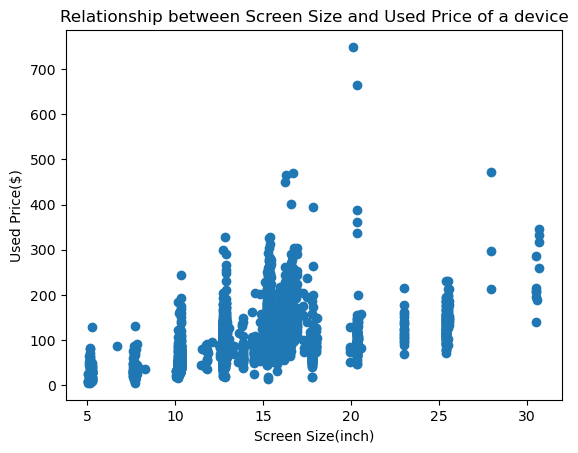

In [80]:
# Screen size correlation rate: 50%
plt.scatter(numerical_df['screen_size'], numerical_df['used_price'])
plt.title('Relationship between Screen Size and Used Price of a device')
plt.xlabel('Screen Size(inch)')
plt.ylabel('Used Price($)')
plt.show()

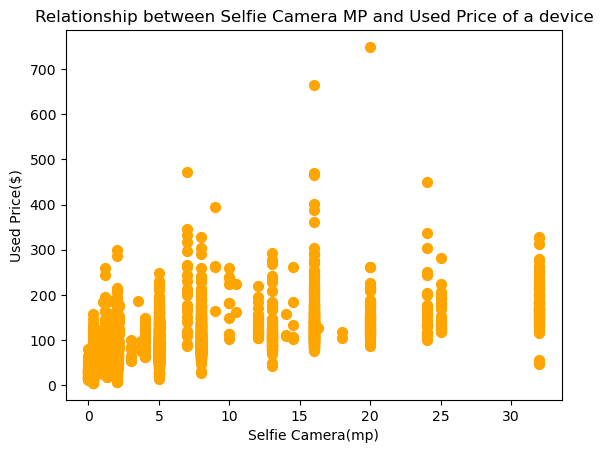

In [81]:
# Selfie camera mp correlation rate: 60%
plt.scatter(numerical_df['selfie_camera_mp'], numerical_df['used_price'], c = 'orange', s = 50)
plt.title('Relationship between Selfie Camera MP and Used Price of a device')
plt.xlabel('Selfie Camera(mp)')
plt.ylabel('Used Price($)')
plt.show()


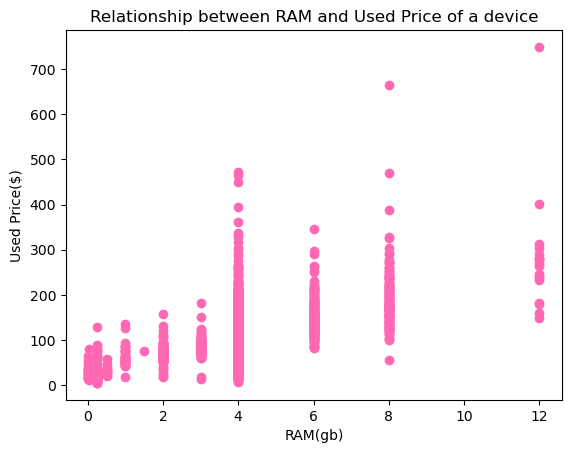

In [82]:
# RAM correlation rate: 50%
plt.scatter(numerical_df['ram'], numerical_df['used_price'], c = 'hotpink')
plt.title('Relationship between RAM and Used Price of a device')
plt.xlabel('RAM(gb)')
plt.ylabel('Used Price($)')
plt.show()


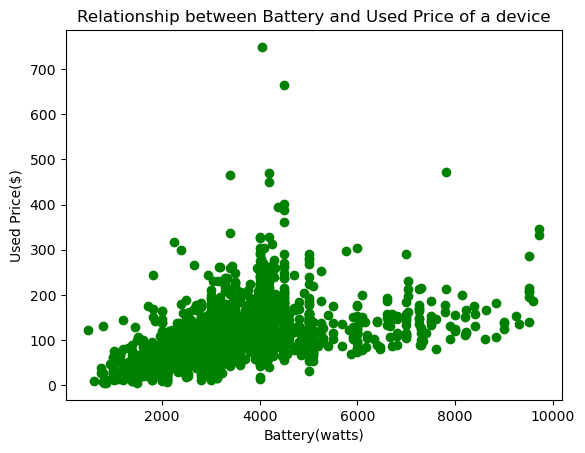

In [83]:
# Battery correlation rate: 50%
plt.scatter(numerical_df['battery'], numerical_df['used_price'], c = 'green')
plt.title('Relationship between Battery and Used Price of a device')
plt.xlabel('Battery(watts)')
plt.ylabel('Used Price($)')
plt.show()
